### Packages
Import sqlite3 to connect with SQLite3 database\
Import pandas to better handle data from tables from database\
Import numpy cause pandas built on numpy plus it has many useful functions\
Import matplotlip and plotly to plot and analyze data

In [1]:
import pandas as pd
import numpy as np
import tool
import matplotlib.pyplot as plt
import plotly.express as px
pd.set_option('display.max_columns', None)

### Rule:
Denominator: Patients with benign colon polyps.

Numerator: count of surgical resections with a diagnosis of benign polyps performed on denominator patients.

Exclusions: 
1) Patients who have malignant polyps alongside benign polyps.


Endoscopy is better than surgery
Surgery risk: mortality rate is 0.7%, rate of major postoperative adverse event is 14%
Endoscopy risk: mortality rate is 0.08% 

### Medical Codes:
| Medical Term | Diagnosis ICD-9-CM | CPT (procedure) | ICD-9-PCS |
| ------------ |  ----------------- | --------------- |  -------- |
| Benign colon polyp | 211.3, 211.4 |                 |           |
| Colonoscopy  |              | 45378, 45380-45385, 45388 | 45.23 |
| Colectomy - surgical resection |  | 44110, 44146, 44150-44160; 44204-44208; 44210-44212| 45.8*, 45.7* |
| Malignant neoplasm of the colon | 152.* |           |           |

### Tool:
Tool has 5 functions:
- get_tables(db_file): get the name of all tables in SQLite database
- create_dataframe(table, db_file): create pandas dataframe based on each tables in the database
- find_codes(df, codes, filter): create a new dataframe with new row that have or do not have the codes
- get_list_codes(start, end, step) to create a list of codes based on range
- violation_rate(left, right, codes) to find the rate of violation based on the procedure code

### Using get_tables(db_file) to quickly glimps the name of all tables
db_file is the name of SQLite database in string

In [2]:
tool.get_tables('claims.db')

Table Name : [('medical_headers',), ('medical_service_lines',)]


### Using create_dataframe(table, db_file) to create dataframe and name what you want
Function accept name of tables in string type as well as the database

In [3]:
df_headers = tool.create_dataframe('medical_headers', 'claims.db')
df_service = tool.create_dataframe('medical_service_lines', 'claims.db')

In [4]:
df_headers.head()

,index,encounter_key,claim_type_code,icd_type,discharge_status_code,admit_type_code,DA,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,diagnosis_group,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,patient_id,total_claim_charge_amount,bill_type_code,doctor_id,hospital_id
0,0,fb9b260015b760e0a5c732a5e38c59cac3b03f422a16d8...,I,9,07,1,68.26,707.05,730.15,70.54,59.9,304.01,34.41,68.26,707.23,596.54,,90.72,,,,,,,,,,,,,,,199,99.29,,,,,,,,,,,,,,,97f755b9e898334c3928ea66c0d976b4c57ae681f0c36e...,000000800365,111,43fd7855edf7b2ae330511f85e3779caad4382cf7377e0...,4bd1a0e54c79caff0fdfae9bf8a54b036aa05558849c12...
1,1,6d86bb8c0c2f8b09768b99af9fe566be64f54f45b835ad...,I,9,03,1,57.89,57.89,3.8,785.59,0.42,995.91,27.6,27.62,19.85,19.7,59.9,276.5,707.09,707.22,28.59,27.68,,,,,,,,,,,153,86.05,97.23,99.04,,,,,,,,,,,,,43a6da3529f59c802ff679d200955b74f7e8dabffce999...,000006603253,111,779e2d9b0c1d92f753ad1f937fd875b65a8dadd59ff59a...,19d7f933040df548188dc2076112ff872a904335cabf5d...
2,2,af38285ba71374e01eef09949b6c67ff704af48f3bbabb...,I,9,01,1,786.5,288.03,0.42,296.2,284.89,296.8,345.9,79.94,45.52,30.51,,,,,,,,,,,,,,,,,063,41.31,87.41,,,,,,,,,,,,,,fa0f0f8a17bab031934344709a9c14e6a735554c2089a0...,000005983241,117,e709515f1e614f41092b9c4a82029654145190d06a9d41...,e2d66df225bfda151073edd988c1cb105f154d04a21837...
3,3,2398ae5f8761928bf5286c210e2c7fabe06c5d04286bc9...,I,9,01,1,427.31,58.49,0.42,27.67,250.42,427.31,427.89,30.51,58.54,403.9,583.81,,,,,,,,,,,,,,,,157,38.95,39.95,,,,,,,,,,,,,,68fa7bb2bd832ecaa20144c7f297849b46d6244731d145...,000004256654,111,274cd8bd73dfc81841a22e5a3cca45173be7abdc2b39b7...,19d7f933040df548188dc2076112ff872a904335cabf5d...
4,4,5f67ba33d85e9324464a330b5e14bc9e96768a0445cada...,I,9,01,4,74.7,74.7,77.07,,770.81,7.69,779.31,77.66,362.24,779.89,530.81,27.63,779.81,799.82,,,,,,,,,,,,,213,96.72,99.15,99.04,96.07,,,,,,,,,,,,3388281fb1d53667d6f7b8731d166680ae00b7fefb4535...,000081897066,111,ddbf0a09050825857a825b43a25d21ab3525d8cfea3f44...,daedcd574abd3b36b4fbdec0b08762bb37107eee207732...


### Using find_codes(df, codes, filter=True) to find rows that have medical codes you need to find
Function receive dataframe. Codes must be in list of strings. Filter default is 1. 

- If filter = 1, function will get all the rows with the medical code you specify in codes
- If filter = 2, function will get all the rows without the medical code you specify in codes
- if filter = 3, function will get all rows from the dataframe plus a column specify what rows have codes you find

In [5]:
df_benign = tool.find_codes(df_headers, ['211.3', '211.4'])

In [6]:
df_benign.head()

,index,encounter_key,claim_type_code,icd_type,discharge_status_code,admit_type_code,DA,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,diagnosis_group,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,patient_id,total_claim_charge_amount,bill_type_code,doctor_id,hospital_id
0,125,b2ff5e25ef396d1b37da4bd7f7bc4ed7bf63242f6807de...,I,9,,,562.1,562.1,211.3,,,,,,,,,,,,,,,,,,,,,,,,146,,,,,,,,,,,,,,,,dce553a9508c25e439171274397adf3be0c31182c5d4bf...,000000740000,831,924f908412a2243aefaaf1a1abbe0651e668e6340c3993...,be265ef876f368e9285623d4202c2db129aaf401c5449f...
1,435,ecff758b15a1a6e93c09f6d3adc7033b27ba48f824d045...,I,9,01,3,54.39,54.39,211.3,,40.19,414.01,27.24,,,,,,,,,,,,,,,,,,,,142,47.01,,,,,,,,,,,,,,,f157360c6b7894973d598204e725a5887b27b0072f2d13...,000001844476,111,880251f5ae409dc658535736b41eadc8456f569f7f9828...,09b2a1add271711f7cda18eedb9a9a6315f4a103e605cf...
2,564,19b516dd184c38e369d34fc774286bcc702b16759753f3...,I,9,,,57.81,57.81,211.3,45.5,44.89,569.49,,,,,,,,,,,,,,,,,,,,,153,,,,,,,,,,,,,,,,4544ac27e14e02f16689c6ae2dab0a004b1610617e4b11...,000000236033,131,95558115a97a04dea62cc868bc5a4f7868c59771eb8376...,1c0a6598efb9ee9c9e2a875b5a8d327f161b6df34c20b9...
3,618,4c231bb6dc7e12b6b54af0ca6d421b3203d2cf4f61f923...,I,9,01,1,56.93,532.4,28.51,59.9,88.82,27.61,40.19,414,,,211.3,535.6,57.9,27.38,211.4,45.5,,,,,,,,,,,153,45.16,45.42,,,,,,,,,,,,,,f9f5840f724cd2b0007f49b5d8a10eec5b25da82f5d605...,000003316075,117,9de9d46a7b57ce0ad6c4d6e26780c8b4a49252c0957409...,9d15ec3cbf06399569956ed421d80c58086363cb464427...
4,636,3fb27b882f9ba1da80b2b8fe68c436ceb572c5d69abc5e...,I,9,,,562.1,562.1,79.34,211.3,45.5,,,,,,,,,,,,,,,,,,,,,,146,,,,,,,,,,,,,,,,09ba0c67ea0d3e24fc368cf371f022c2cb18f2a3caa48b...,000000432100,131,f4fe9d68e9a06488e63ab414c44bbb6f7c37ecb6a3320c...,b4730e5b559347e2db23c0086492d99dc1cef0d0b16120...


### Using get_list_codes(start, end, step) to get a range of code for example 44150-44160 or 152.*
End must be bigger than start and step should not be bigger than both start and end

Function can accept float or int but not string

In [7]:
codes = tool.get_list_codes(152.0,152.9,0.1)

### Exclude patients who have maligant polyups alongside benign polyps

In [8]:
df_better = tool.find_codes(df_benign, codes, filter=2)

In [9]:
df_better.head()

,index,encounter_key,claim_type_code,icd_type,discharge_status_code,admit_type_code,DA,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,diagnosis_group,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,patient_id,total_claim_charge_amount,bill_type_code,doctor_id,hospital_id
0,125,b2ff5e25ef396d1b37da4bd7f7bc4ed7bf63242f6807de...,I,9,,,562.1,562.1,211.3,,,,,,,,,,,,,,,,,,,,,,,,146,,,,,,,,,,,,,,,,dce553a9508c25e439171274397adf3be0c31182c5d4bf...,000000740000,831,924f908412a2243aefaaf1a1abbe0651e668e6340c3993...,be265ef876f368e9285623d4202c2db129aaf401c5449f...
1,435,ecff758b15a1a6e93c09f6d3adc7033b27ba48f824d045...,I,9,01,3,54.39,54.39,211.3,,40.19,414.01,27.24,,,,,,,,,,,,,,,,,,,,142,47.01,,,,,,,,,,,,,,,f157360c6b7894973d598204e725a5887b27b0072f2d13...,000001844476,111,880251f5ae409dc658535736b41eadc8456f569f7f9828...,09b2a1add271711f7cda18eedb9a9a6315f4a103e605cf...
2,564,19b516dd184c38e369d34fc774286bcc702b16759753f3...,I,9,,,57.81,57.81,211.3,45.5,44.89,569.49,,,,,,,,,,,,,,,,,,,,,153,,,,,,,,,,,,,,,,4544ac27e14e02f16689c6ae2dab0a004b1610617e4b11...,000000236033,131,95558115a97a04dea62cc868bc5a4f7868c59771eb8376...,1c0a6598efb9ee9c9e2a875b5a8d327f161b6df34c20b9...
3,618,4c231bb6dc7e12b6b54af0ca6d421b3203d2cf4f61f923...,I,9,01,1,56.93,532.4,28.51,59.9,88.82,27.61,40.19,414,,,211.3,535.6,57.9,27.38,211.4,45.5,,,,,,,,,,,153,45.16,45.42,,,,,,,,,,,,,,f9f5840f724cd2b0007f49b5d8a10eec5b25da82f5d605...,000003316075,117,9de9d46a7b57ce0ad6c4d6e26780c8b4a49252c0957409...,9d15ec3cbf06399569956ed421d80c58086363cb464427...
4,636,3fb27b882f9ba1da80b2b8fe68c436ceb572c5d69abc5e...,I,9,,,562.1,562.1,79.34,211.3,45.5,,,,,,,,,,,,,,,,,,,,,,146,,,,,,,,,,,,,,,,09ba0c67ea0d3e24fc368cf371f022c2cb18f2a3caa48b...,000000432100,131,f4fe9d68e9a06488e63ab414c44bbb6f7c37ecb6a3320c...,b4730e5b559347e2db23c0086492d99dc1cef0d0b16120...


### Using get_list_codes to get a list of all colectomy resection code

In [10]:
codes_ = [44110, 44146] + tool.get_list_codes(44150,44160,1) + tool.get_list_codes(44204,44208,1) + tool.get_list_codes(44210,44212,1) + tool.get_list_codes(45.7, 45.89, 0.01)

### Using violation_rate(left, right, codes) to find violation rate
#### Function strictly use to find violation rate (number of any violation/ number of patients diagnosed with the any health problem)
Function receives two dataframe one of which is the medical_service_lines table dataframe, and receives violation medical code

In [12]:
df = tool.violation_rate(df_better, df_service, codes_)

In [13]:
df.sort_values(by=['rate'])

,doctor_id,index,violate,number_of_patients,rate
0,00011a3bdb96736407f60e498f001ac8075a4260bd805c...,612945,0,1,0.0
1106,98ca567d088303c2fb5c33308150862e49b4c6421f7acc...,154390,0,1,0.0
1105,98c23667dc9984057165832ee6c3093c6d0af00ec705af...,114560,0,1,0.0
1100,975e2870b6d2dc73302bb128cab23fc9abb8c34e128714...,929303,0,1,0.0
1099,96f57f1f4af23beede5e1d6f2bdcaa92ad1f21317ddbd9...,180199,0,1,0.0
...,...,...,...,...,...
335,2e86ff1ccfddd631a78c8bf195027a815a312f1aed1e27...,1225931,1,1,1.0
1549,cf395fe624cffc35f80f069219530cc0ffa67f1a61f233...,1195497,1,1,1.0
968,861d922b2adf4a171a3682f44496642ab2d7c851498c9c...,893983,2,2,1.0
831,73ab3aab24f34db8a2455ea293403bceb04d8873073266...,3196684,2,2,1.0


## Analyze
Ranking doctor based on violation rate is not entirely accurate\
Looking at the histogram we can see there are a lot of doctors who has 0% violation rate which mean they did not refer colectomy resection for their benign colon polyp patients\
However based on the scatter plot, we can see a lot of flawless doctors did not treat many colon polyp patients.\
We should recommend doctors who has the lowest rate with the highest amount of benign colon polyp patients

<AxesSubplot:>

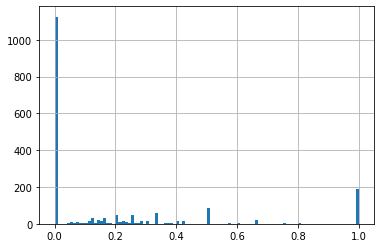

In [14]:
df['rate'].hist(bins=100)

In [15]:
fig = px.scatter(df[df['number_of_patients']<100], x='rate', y='number_of_patients', hover_data=['doctor_id'])
fig.show()

### Include this scatter plot in case plotly crash when open on diffrent computer

<AxesSubplot:xlabel='rate', ylabel='number_of_patients'>

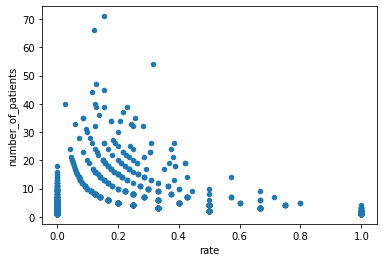

In [16]:
df[df['number_of_patients']<100].plot.scatter(x='rate', y='number_of_patients')